### Import Library

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

import warnings
warnings.filterwarnings('ignore')

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# A. DATA EXPLORATION

## Read the Data

### AAPL

In [32]:
df1 = pd.read_csv("/content/drive/MyDrive/UAS_DEEPLEARNING/DATA/AAPL.csv")
df1.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.406782,117258400
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.385558,43971200
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.357260,26432000
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366103,21610400
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.376715,18362400


In [33]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9909 entries, 0 to 9908
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       9909 non-null   object 
 1   Open       9909 non-null   float64
 2   High       9909 non-null   float64
 3   Low        9909 non-null   float64
 4   Close      9909 non-null   float64
 5   Adj Close  9909 non-null   float64
 6   Volume     9909 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 542.0+ KB


In [34]:
df1.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [35]:
df1.shape

(9909, 7)

### AMD

In [36]:
df2 = pd.read_csv("/content/drive/MyDrive/UAS_DEEPLEARNING/DATA/AMD.csv")
df2.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-17,0.0,3.302083,3.125000,3.145833,3.145833,219600
1,1980-03-18,0.0,3.125000,2.937500,3.031250,3.031250,727200
2,1980-03-19,0.0,3.083333,3.020833,3.041667,3.041667,295200
3,1980-03-20,0.0,3.062500,3.010417,3.010417,3.010417,159600
4,1980-03-21,0.0,3.020833,2.906250,2.916667,2.916667,130800


In [37]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10098 entries, 0 to 10097
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10098 non-null  object 
 1   Open       10098 non-null  float64
 2   High       10098 non-null  float64
 3   Low        10098 non-null  float64
 4   Close      10098 non-null  float64
 5   Adj Close  10098 non-null  float64
 6   Volume     10098 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 552.4+ KB


In [38]:
df2.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [39]:
df2.shape

(10098, 7)

## Data Preprocessing

### AAPL

In [40]:
df1 = pd.read_csv("/content/drive/MyDrive/UAS_DEEPLEARNING/DATA/AAPL.csv", parse_dates=["Date"], index_col=["Date"])
df1.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.513393,0.515625,0.513393,0.513393,0.406782,117258400
1980-12-15,0.488839,0.488839,0.486607,0.486607,0.385558,43971200
1980-12-16,0.453125,0.453125,0.450893,0.450893,0.357260,26432000
1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366103,21610400
1980-12-18,0.475446,0.477679,0.475446,0.475446,0.376715,18362400


In [41]:
df1 = pd.DataFrame(df1["Close"])
df1.head()

,Close
Date,
1980-12-12,0.513393
1980-12-15,0.486607
1980-12-16,0.450893
1980-12-17,0.462054
1980-12-18,0.475446


### AMD

In [42]:
df2 = pd.read_csv("/content/drive/MyDrive/UAS_DEEPLEARNING/DATA/AMD.csv", parse_dates=["Date"], index_col=["Date"])
df2.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-03-17,0.0,3.302083,3.125000,3.145833,3.145833,219600
1980-03-18,0.0,3.125000,2.937500,3.031250,3.031250,727200
1980-03-19,0.0,3.083333,3.020833,3.041667,3.041667,295200
1980-03-20,0.0,3.062500,3.010417,3.010417,3.010417,159600
1980-03-21,0.0,3.020833,2.906250,2.916667,2.916667,130800


In [43]:
df2 = pd.DataFrame(df2["Close"])
df2.head()

,Close
Date,
1980-03-17,3.145833
1980-03-18,3.031250
1980-03-19,3.041667
1980-03-20,3.010417
1980-03-21,2.916667


## Check Missing Values

### AAPL

In [44]:
df1.isna().sum()

Close    0
dtype: int64

### AMD

In [45]:
df2.isna().sum()

Close    0
dtype: int64

## Visualization Trends Over Time

Saya melakukan visualisasi untuk mengidentifikasi pola umum, tren jangka panjang, dan fluktuasi dalam harga penutupan saham Apple (AAPL) maupun AMD Advanced Micro Devices (AMD) dari waktu ke waktu. Dengan memplot data ini, saya dapat melihat apakah ada periode kenaikan atau penurunan yang konsisten, serta mengenali pola musiman atau siklus yang mungkin ada dalam data. Visualisasi ini juga membantu dalam memahami stabilitas pasar dan dapat memberikan wawasan awal untuk membangun model prediksi yang lebih akurat.

### AAPL

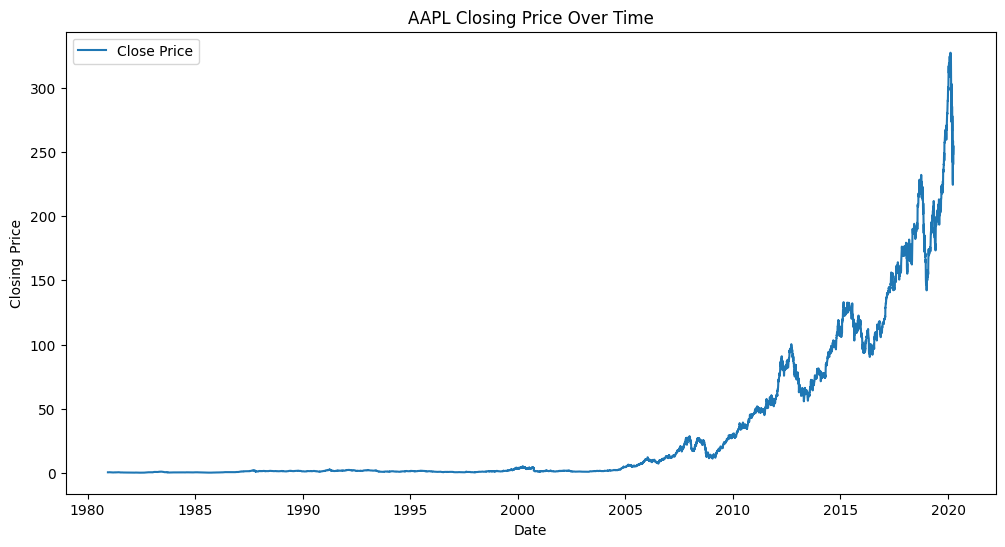

In [46]:
plt.figure(figsize=(12, 6))
plt.plot(df1, label='Close Price')
plt.title('AAPL Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

1. Ada tren kenaikan yang signifikan dalam harga penutupan saham AAPL sejak tahun 2000-an, dengan peningkatan yang sangat tajam terutama setelah tahun 2010.
2. Walaupun ada beberapa fluktuasi, tren umumnya naik, menunjukkan pertumbuhan yang konsisten dan kuat dalam jangka panjang.
3. Peningkatan yang sangat tajam terlihat setelah tahun 2010, mencerminkan kesuksesan produk dan strategi perusahaan dalam beberapa dekade terakhir.

### AMD

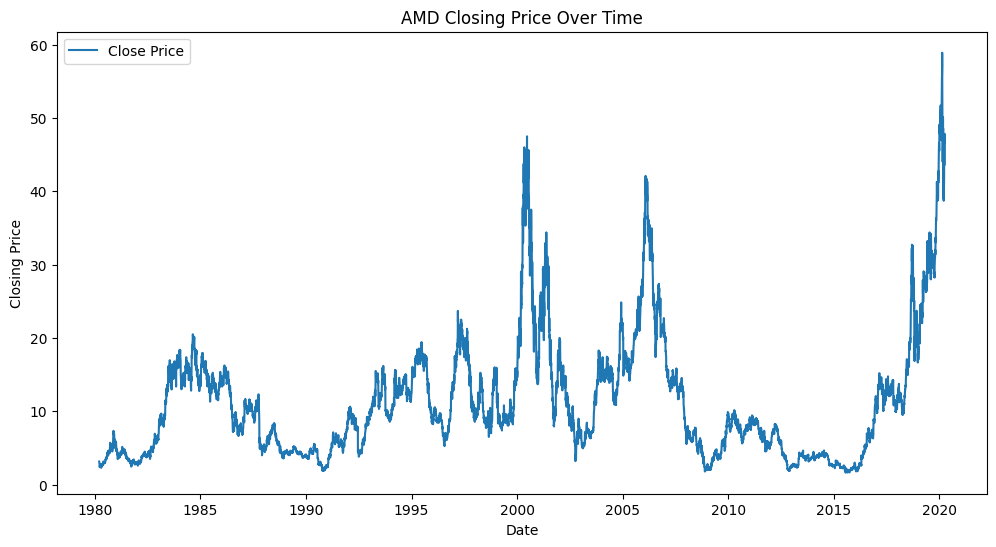

In [47]:
plt.figure(figsize=(12, 6))
plt.plot(df2, label='Close Price')
plt.title('AMD Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

1. Saham AMD menunjukkan volatilitas yang lebih tinggi dibandingkan dengan AAPL, dengan beberapa puncak dan penurunan tajam sepanjang periode yang sama.
2. Ada beberapa siklus peningkatan dan penurunan yang jelas, dengan puncak signifikan sekitar tahun 2000 dan penurunan drastis setelahnya, diikuti oleh puncak lain sekitar tahun 2018-2019.
3. Sejak sekitar tahun 2016, harga penutupan saham AMD menunjukkan tren naik yang kuat, menandakan pemulihan dan pertumbuhan yang signifikan dalam beberapa tahun terakhir.

Secara keseluruhan, saham AAPL menunjukkan tren pertumbuhan yang lebih stabil dan konsisten, sedangkan saham AMD lebih volatil tetapi menunjukkan pemulihan dan pertumbuhan yang signifikan dalam beberapa tahun terakhir.

## Distribution Data by Date

### AAPL

Distribusi Hari dalam Seminggu:
 Day of Week
Friday       1981
Monday       1875
Thursday     1992
Tuesday      2031
Wednesday    2030
Name: count, dtype: int64


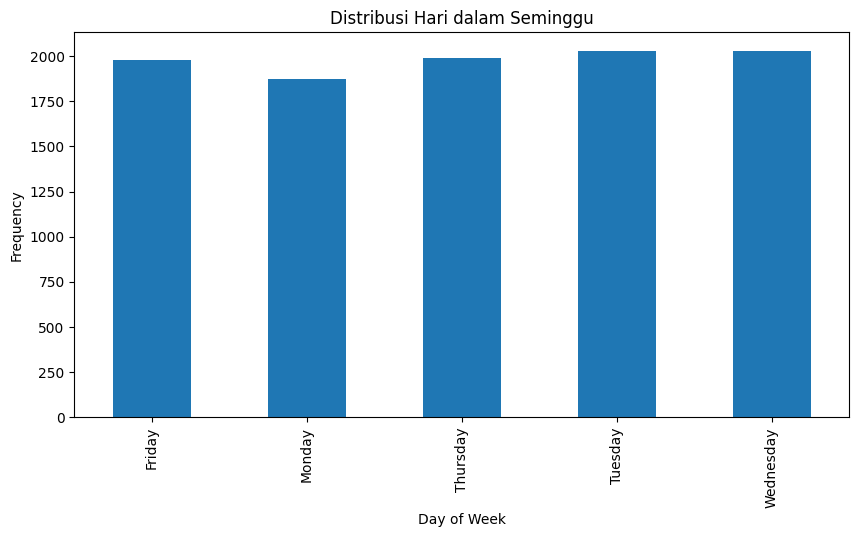

In [48]:
df1['Day of Week'] = df1.index.day_name()
df1['Month'] = df1.index.month
df1['Year'] = df1.index.year

day_distribution = df1['Day of Week'].value_counts().sort_index()
print("Distribusi Hari dalam Seminggu:\n", day_distribution)

plt.figure(figsize=(10, 5))
day_distribution.plot(kind='bar')
plt.title('Distribusi Hari dalam Seminggu')
plt.xlabel('Day of Week')
plt.ylabel('Frequency')
plt.show()

Distribusi saham per hari berbeda jumlahnya karena adanya hari libur atau penutupan pasar yang tidak merata sepanjang minggu. Sebagai contoh, hari libur yang jatuh pada hari Senin atau Jumat dapat mengurangi jumlah hari perdagangan pada hari tersebut dibandingkan dengan hari lain dalam seminggu. Selain itu, pengaturan jam perdagangan dan kejadian khusus yang mempengaruhi pasar juga dapat menyebabkan variasi dalam distribusi perdagangan harian.

Distribusi Bulanan:
 Month
1     827
2     767
3     875
4     807
5     825
6     834
7     825
8     863
9     791
10    862
11    797
12    836
Name: count, dtype: int64


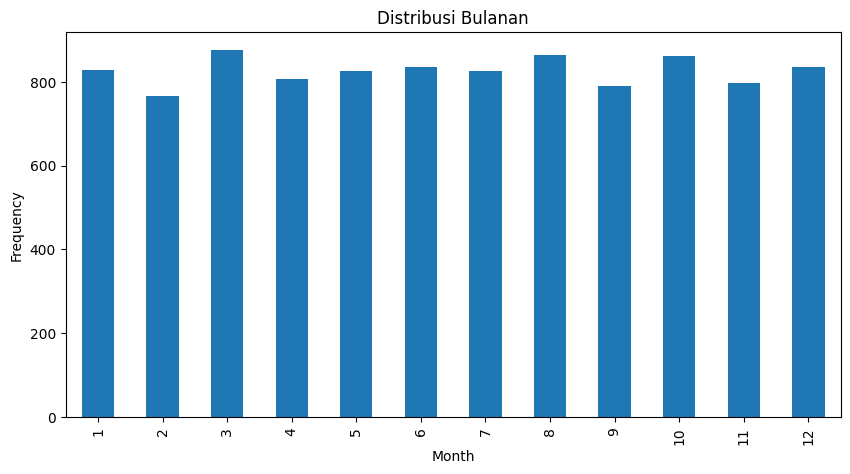

In [49]:
monthly_distribution = df1['Month'].value_counts().sort_index()
print("Distribusi Bulanan:\n", monthly_distribution)

plt.figure(figsize=(10, 5))
monthly_distribution.plot(kind='bar')
plt.title('Distribusi Bulanan')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.show()

Distribusi Tahunan:
 Year
1980     13
1981    252
1982    253
1983    253
1984    253
1985    252
1986    253
1987    253
1988    253
1989    252
1990    253
1991    253
1992    254
1993    253
1994    252
1995    252
1996    254
1997    253
1998    252
1999    252
2000    252
2001    248
2002    252
2003    252
2004    252
2005    252
2006    251
2007    251
2008    253
2009    252
2010    252
2011    252
2012    250
2013    252
2014    252
2015    252
2016    252
2017    251
2018    251
2019    252
2020     63
Name: count, dtype: int64


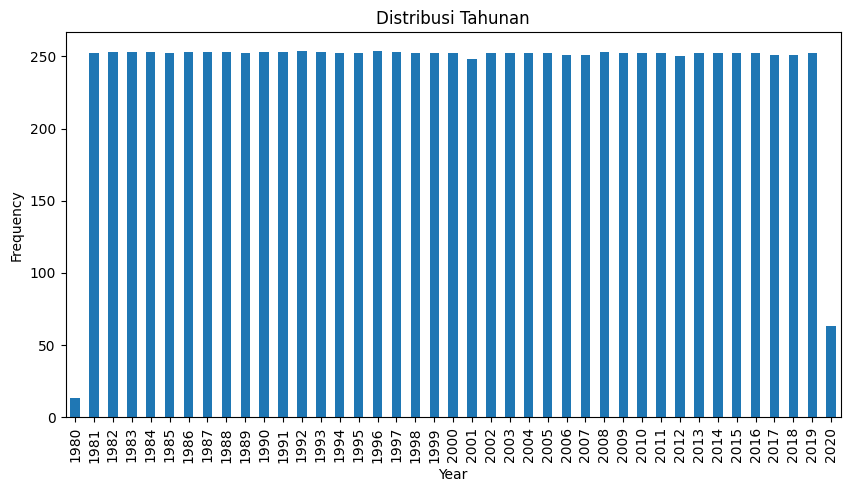

In [50]:
yearly_distribution = df1['Year'].value_counts().sort_index()
print("Distribusi Tahunan:\n", yearly_distribution)

plt.figure(figsize=(10, 5))
yearly_distribution.plot(kind='bar')
plt.title('Distribusi Tahunan')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

### AMD

Distribusi Hari dalam Seminggu (AMD):
 Day of Week
Friday       2017
Monday       1913
Thursday     2030
Tuesday      2069
Wednesday    2069
Name: count, dtype: int64


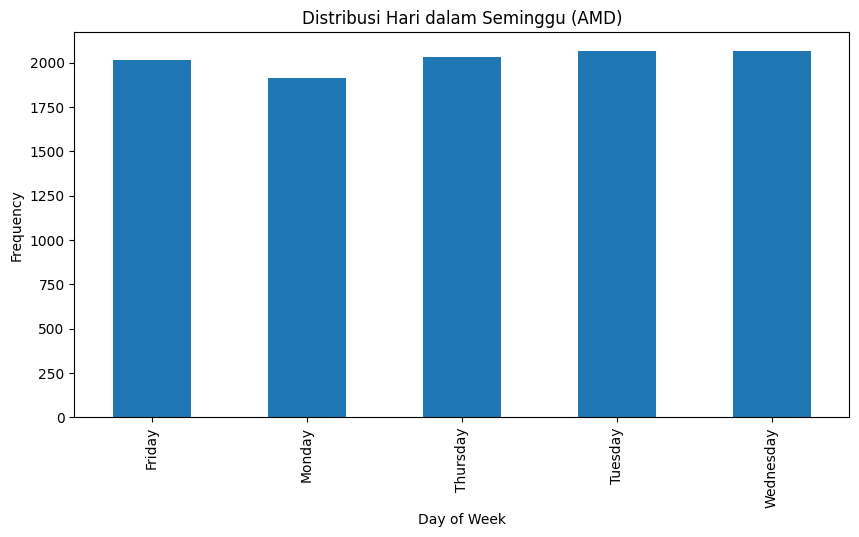

In [51]:
df2['Day of Week'] = df2.index.day_name()
df2['Month'] = df2.index.month
df2['Year'] = df2.index.year

day_distribution_amd = df2['Day of Week'].value_counts().sort_index()
print("Distribusi Hari dalam Seminggu (AMD):\n", day_distribution_amd)

plt.figure(figsize=(10, 5))
day_distribution_amd.plot(kind='bar')
plt.title('Distribusi Hari dalam Seminggu (AMD)')
plt.xlabel('Day of Week')
plt.ylabel('Frequency')
plt.show()

Distribusi Bulanan (AMD):
 Month
1     827
2     767
3     886
4     828
5     846
6     855
7     847
8     885
9     812
10    885
11    815
12    845
Name: count, dtype: int64


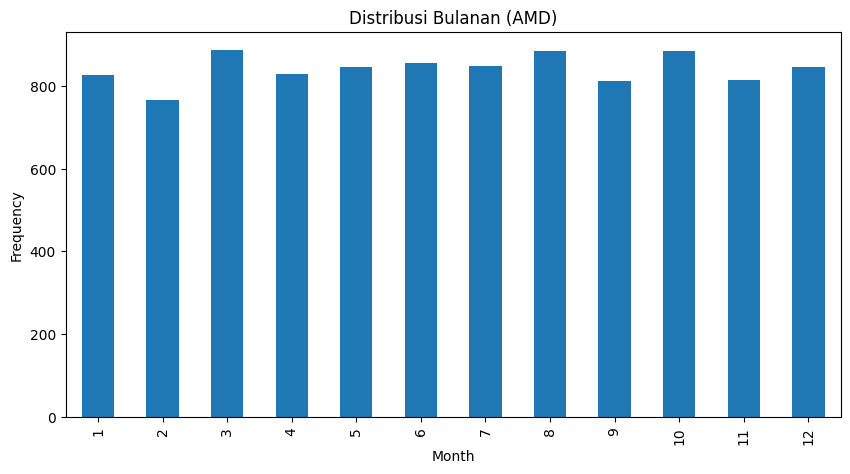

In [52]:
monthly_distribution_amd = df2['Month'].value_counts().sort_index()
print("Distribusi Bulanan (AMD):\n", monthly_distribution_amd)

plt.figure(figsize=(10, 5))
monthly_distribution_amd.plot(kind='bar')
plt.title('Distribusi Bulanan (AMD)')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.show()

Distribusi Tahunan (AMD):
 Year
1980    201
1981    253
1982    253
1983    253
1984    253
1985    252
1986    253
1987    253
1988    253
1989    252
1990    253
1991    253
1992    254
1993    253
1994    252
1995    252
1996    254
1997    253
1998    252
1999    252
2000    252
2001    248
2002    252
2003    252
2004    252
2005    252
2006    251
2007    251
2008    253
2009    252
2010    252
2011    252
2012    250
2013    252
2014    252
2015    252
2016    252
2017    251
2018    251
2019    252
2020     63
Name: count, dtype: int64


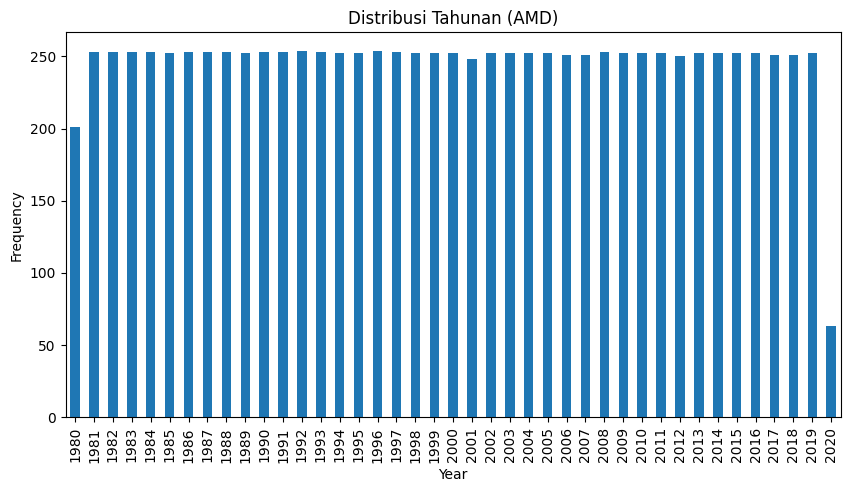

In [53]:
yearly_distribution_amd = df2['Year'].value_counts().sort_index()
print("Distribusi Tahunan (AMD):\n", yearly_distribution_amd)

plt.figure(figsize=(10, 5))
yearly_distribution_amd.plot(kind='bar')
plt.title('Distribusi Tahunan (AMD)')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

## Descriptive Statistics

Saya menghitung statistik deskriptif pada kedua saham untuk memberikan gambaran awal tentang distribusi, central tendency (seperti mean dan median), dan variabilitas (seperti standard deviation) dari harga penutupan saham. Statistik ini juga membantu dalam memahami karakteristik dasar data, seperti rentang harga, tingkat fluktuasi, dan pola umum yang mungkin ada. Hal ini tentu sebagai langkah awal yang kritis untuk mengidentifikasi potensi anomali, tren, dan pola yang bisa mempengaruhi analisis lebih lanjut atau model prediksi yang akan dibangun.

### AAPL

In [54]:
df1.describe()

,Close,Month,Year
count,9909.000000,9909.000000,9909.000000
mean,32.618030,6.515289,2000.079625
std,58.471899,3.443015,11.348643
min,0.196429,1.000000,1980.000000
25%,1.071429,4.000000,1990.000000
50%,1.732143,7.000000,2000.000000
75%,35.761429,10.000000,2010.000000
max,327.200012,12.000000,2020.000000


1. Terdapat 9909 data poin.
2. Mean sebesar 32.62, yang menunjukkan rata-rata harga penutupan saham AAPL selama periode data.
3. Standard deviation (std) sebesar 58.47 menunjukkan variasi harga penutupan yang cukup tinggi.
4. Harga penutupan minimum adalah 0.196 dan maksimum adalah 327.20, menunjukkan kisaran harga yang sangat luas.
5. Distribusi Harga:
  - 25% dari harga penutupan berada di bawah 1.07
  - Median (50%) harga penutupan adalah 1.73
  - 75% dari harga penutupan berada di bawah 35.76

### AMD

In [55]:
df2.describe()

,Close,Month,Year
count,10098.000000,10098.000000,10098.000000
mean,11.210802,6.532284,1999.703902
std,8.283645,3.431123,11.566459
min,1.620000,1.000000,1980.000000
25%,4.937500,4.000000,1990.000000
50%,9.062500,7.000000,2000.000000
75%,14.707500,10.000000,2010.000000
max,58.900002,12.000000,2020.000000


1. Terdapat 10098 data poin.
2. Mean sebesar 11.21, lebih rendah dibandingkan dengan AAPL.
3. Standard deviation (std) sebesar 8.28, menunjukkan variasi harga yang lebih rendah dibandingkan AAPL.
4. Harga penutupan minimum adalah 1.62 dan maksimum adalah 58.90, menunjukkan kisaran harga yang lebih sempit dibandingkan AAPL.
5. Distribusi Harga:
  - 25% dari harga penutupan berada di bawah 4.93
  - Median (50%) harga penutupan adalah 9.06
  - 75% dari harga penutupan berada di bawah 14.71

Kesimpulannya:
- AAPL menunjukkan harga penutupan yang lebih tinggi secara rata-rata dan lebih bervariasi dibandingkan dengan AMD.
- AMD memiliki kisaran harga yang lebih sempit dan harga penutupan rata-rata yang lebih rendah, menunjukkan volatilitas yang lebih terkendali dibandingkan dengan AAPL.
- Distribusi harga penutupan AAPL lebih lebar, menandakan bahwa ada periode dengan fluktuasi harga yang sangat tinggi, sedangkan AMD lebih konsisten tetapi tetap memiliki beberapa puncak harga.

Berdasarkan hasil statistik deskriptif di atas untuk kedua dataset (AAPL dan AMD), menurut saya scaling sangat disarankan untuk beberapa alasan berikut:
1. Dataset AAPL memiliki rentang nilai yang sangat luas, dari 0.196 hingga 327.200. Perbedaan yang signifikan dalam rentang nilai ini dapat menyebabkan model kesulitan dalam konvergensi selama pelatihan.
2. Dataset AMD juga memiliki variasi dalam rentang nilai, meskipun lebih kecil dibandingkan dengan AAPL. Scaling akan membantu dalam memastikan bahwa fitur input memiliki rentang yang konsisten, yang penting untuk stabilitas dan kecepatan pelatihan model.
3. Banyak algoritma machine learning, terutama LSTM, sensitif terhadap skala fitur. Jika fitur tidak diskalakan, algoritma dapat memberikan bobot yang tidak proporsional pada fitur tertentu, yang dapat mengurangi kinerja model.

## Data Splitting

Disini saya memisahkan data time series tersebut menjadi dua bagian: input dan output, dengan window size = 5 [dari hari senin s.d jumat] dan horizon = 1 [hari senin saja]. Selain itu, dataset juga dibagi menjadi train, test dan validation set dengan ketentuan (80 train, 10 val, 10 test)

- Window Size = 5: Ini berarti model menggunakan data harga saham dari 5 hari berturut-turut sebagai input untuk memprediksi harga saham pada hari berikutnya. Dalam konteks ini, data dari hari Senin hingga Jumat digunakan sebagai input.

- Horizon = 1: Ini berarti model memprediksi harga saham pada hari berikutnya setelah window size. Dalam konteks ini, model memprediksi harga saham pada hari Senin berikutnya.

Function untuk membuat dataset time series

In [27]:
def create_time_series_dataset(data, window_size=5, horizon=1):
    X, y = [], []
    for i in range(len(data) - window_size - horizon + 1):
        X.append(data[i:(i + window_size)])
        y.append(data[i + window_size + horizon - 1])
    return np.array(X), np.array(y)

Mengambil close price untuk saham AAPL dan AMD

In [28]:
data_aapl = df1['Close'].values
data_amd = df2['Close'].values

Function untuk menampilkan beberapa baris pertama dari masing-masing subset dataset AMD

In [29]:
def print_split_data(X, y, name):
    print(f"Data {name}:")
    for i in range(3):
        print(f"X: {X[i]}, y: {y[i]}")
    print("\n")

### AAPL

In [56]:
X_aapl, y_aapl = create_time_series_dataset(data_aapl, window_size=5, horizon=1)
train_size_aapl = int(len(X_aapl) * 0.8)
val_size_aapl = int(len(X_aapl) * 0.1)
test_size_aapl = len(X_aapl) - train_size_aapl - val_size_aapl
X_train_aapl, y_train_aapl = X_aapl[:train_size_aapl], y_aapl[:train_size_aapl]
X_val_aapl, y_val_aapl = X_aapl[train_size_aapl:train_size_aapl + val_size_aapl], y_aapl[train_size_aapl:train_size_aapl + val_size_aapl]
X_test_aapl, y_test_aapl = X_aapl[train_size_aapl + val_size_aapl:], y_aapl[train_size_aapl + val_size_aapl:]

print(f"Ukuran X_train_aapl: {X_train_aapl.shape}, y_train_aapl: {y_train_aapl.shape}")
print(f"Ukuran X_val_aapl: {X_val_aapl.shape}, y_val_aapl: {y_val_aapl.shape}")
print(f"Ukuran X_test_aapl: {X_test_aapl.shape}, y_test_aapl: {y_test_aapl.shape}")

Ukuran X_train_aapl: (7923, 5), y_train_aapl: (7923,)
Ukuran X_val_aapl: (990, 5), y_val_aapl: (990,)
Ukuran X_test_aapl: (991, 5), y_test_aapl: (991,)


In [57]:
print_split_data(X_train_aapl, y_train_aapl, 'Train')
print_split_data(X_val_aapl, y_val_aapl, 'Validation')
print_split_data(X_test_aapl, y_test_aapl, 'Test')

Data Train:
X: [0.51339287 0.48660713 0.45089287 0.46205357 0.47544643], y: 0.5044642686843872
X: [0.48660713 0.45089287 0.46205357 0.47544643 0.50446427], y: 0.5290178656578064
X: [0.45089287 0.46205357 0.47544643 0.50446427 0.52901787], y: 0.5513392686843872


Data Validation:
X: [81.50285339 80.95857239 79.74571228 79.02428436 78.01142883], y: 75.73143005371094
X: [80.95857239 79.74571228 79.02428436 78.01142883 75.73143005], y: 75.76856994628906
X: [79.74571228 79.02428436 78.01142883 75.73143005 75.76856995], y: 80.18285369873047


Data Test:
X: [106.91000366 107.12999725 105.97000122 105.68000031 105.08000183], y: 104.3499984741211
X: [107.12999725 105.97000122 105.68000031 105.08000183 104.34999847], y: 97.81999969482422
X: [105.97000122 105.68000031 105.08000183 104.34999847  97.81999969], y: 94.83000183105467




### AMD

In [58]:
X_amd, y_amd = create_time_series_dataset(data_amd, window_size=5, horizon=1)
train_size_amd = int(len(X_amd) * 0.8)
val_size_amd = int(len(X_amd) * 0.1)
test_size_amd = len(X_amd) - train_size_amd - val_size_amd
X_train_amd, y_train_amd = X_amd[:train_size_amd], y_amd[:train_size_amd]
X_val_amd, y_val_amd = X_amd[train_size_amd:train_size_amd + val_size_amd], y_amd[train_size_amd:train_size_amd + val_size_amd]
X_test_amd, y_test_amd = X_amd[train_size_amd + val_size_amd:], y_amd[train_size_amd + val_size_amd:]

print(f"Ukuran X_train_amd: {X_train_amd.shape}, y_train_amd: {y_train_amd.shape}")
print(f"Ukuran X_val_amd: {X_val_amd.shape}, y_val_amd: {y_val_amd.shape}")
print(f"Ukuran X_test_amd: {X_test_amd.shape}, y_test_amd: {y_test_amd.shape}")

Ukuran X_train_amd: (8074, 5), y_train_amd: (8074,)
Ukuran X_val_amd: (1009, 5), y_val_amd: (1009,)
Ukuran X_test_amd: (1010, 5), y_test_amd: (1010,)


In [59]:
print_split_data(X_train_amd, y_train_amd, 'Train')
print_split_data(X_val_amd, y_val_amd, 'Validation')
print_split_data(X_test_amd, y_test_amd, 'Test')

Data Train:
X: [3.14583325 3.03125    3.04166675 3.01041675 2.91666675], y: 2.6666667461395264
X: [3.03125    3.04166675 3.01041675 2.91666675 2.66666675], y: 2.6041667461395264
X: [3.04166675 3.01041675 2.91666675 2.66666675 2.60416675], y: 2.4479167461395264


Data Validation:
X: [8.19999981 8.18000031 8.06000042 8.03999996 8.02999973], y: 8.09000015258789
X: [8.18000031 8.06000042 8.03999996 8.02999973 8.09000015], y: 8.239999771118164
X: [8.06000042 8.03999996 8.02999973 8.09000015 8.23999977], y: 8.1899995803833


Data Test:
X: [2.78999996 2.68000007 2.78999996 2.77999997 2.8599999 ], y: 2.859999895095825
X: [2.68000007 2.78999996 2.77999997 2.8599999  2.8599999 ], y: 2.8499999046325684
X: [2.78999996 2.77999997 2.8599999  2.8599999  2.8499999 ], y: 2.8299999237060547




## Data Scaling

Saya memiliih untuk menggunakan **Min-Max Scaling** karenalebih baik untuk data time series seperti ini. Metode ini memastikan semua fitur berada dalam rentang yang sama [0, 1], yang membantu model LSTM dalam menangani data dengan rentang nilai yang sangat luas dan meningkatkan stabilitas serta konvergensi selama pelatihan.

Hal yang terpenting adalah data hasil scaling harus diubah kembali ke bentuk 3D karena model LSTM di TensorFlow/Keras mengharapkan input dengan bentuk tiga dimensi: `[samples, timesteps, features]`. Dimensi ini merepresentasikan jumlah sampel, urutan waktu untuk setiap sampel, dan jumlah fitur pada setiap timestep, yang memungkinkan LSTM untuk memproses data time series secara berurutan dan belajar dari pola temporal dalam data tersebut.

### AAPL

In [60]:
scaler_aapl = MinMaxScaler()
scaler_aapl.fit(data_aapl[:train_size_aapl].reshape(-1, 1))

X_train_aapl_scaled = scaler_aapl.transform(X_train_aapl.reshape(-1, 1)).reshape(X_train_aapl.shape[0], X_train_aapl.shape[1], 1)
y_train_aapl_scaled = scaler_aapl.transform(y_train_aapl.reshape(-1, 1)).reshape(-1)
X_val_aapl_scaled = scaler_aapl.transform(X_val_aapl.reshape(-1, 1)).reshape(X_val_aapl.shape[0], X_val_aapl.shape[1], 1)
y_val_aapl_scaled = scaler_aapl.transform(y_val_aapl.reshape(-1, 1)).reshape(-1)
X_test_aapl_scaled = scaler_aapl.transform(X_test_aapl.reshape(-1, 1)).reshape(X_test_aapl.shape[0], X_test_aapl.shape[1], 1)
y_test_aapl_scaled = scaler_aapl.transform(y_test_aapl.reshape(-1, 1)).reshape(-1)

Simpan nilai min dan max dari data training aapl

In [61]:
min_val = data_aapl[:train_size_aapl].min()
max_val = data_aapl[:train_size_aapl].max()

In [ ]:
print(f"Ukuran X_train_aapl_scaled: {X_train_aapl_scaled.shape}, y_train_aapl_scaled: {y_train_aapl_scaled.shape}")
print(f"Ukuran X_val_aapl_scaled: {X_val_aapl_scaled.shape}, y_val_aapl_scaled: {y_val_aapl_scaled.shape}")
print(f"Ukuran X_test_aapl_scaled: {X_test_aapl_scaled.shape}, y_test_aapl_scaled: {y_test_aapl_scaled.shape}")

Ukuran X_train_aapl_scaled: (7923, 5, 1), y_train_aapl_scaled: (7923,)
Ukuran X_val_aapl_scaled: (990, 5, 1), y_val_aapl_scaled: (990,)
Ukuran X_test_aapl_scaled: (991, 5, 1), y_test_aapl_scaled: (991,)


In [ ]:
print_split_data(X_train_aapl_scaled, y_train_aapl_scaled, 'Train')
print_split_data(X_val_aapl_scaled, y_val_aapl_scaled, 'Validation')
print_split_data(X_test_aapl_scaled, y_test_aapl_scaled, 'Test')

Data Train:
X: [[0.00349489]
 [0.00319955]
 [0.00280576]
 [0.00292882]
 [0.00307649]], y: 0.003396444739354637
X: [[0.00319955]
 [0.00280576]
 [0.00292882]
 [0.00307649]
 [0.00339644]], y: 0.003667176134653651
X: [[0.00280576]
 [0.00292882]
 [0.00307649]
 [0.00339644]
 [0.00366718]], y: 0.003913295047208902


Data Validation:
X: [[0.89649601]
 [0.8904947 ]
 [0.87712153]
 [0.86916697]
 [0.85799908]], y: 0.832859493804597
X: [[0.8904947 ]
 [0.87712153]
 [0.86916697]
 [0.85799908]
 [0.83285949]], y: 0.8332690034560675
X: [[0.87712153]
 [0.86916697]
 [0.85799908]
 [0.83285949]
 [0.833269  ]], y: 0.8819415136727164


Data Test:
X: [[1.17663881]
 [1.17906449]
 [1.16627421]
 [1.16307662]
 [1.15646095]], y: 1.1484118329712603
X: [[1.17906449]
 [1.16627421]
 [1.16307662]
 [1.15646095]
 [1.14841183]], y: 1.0764111528780855
X: [[1.16627421]
 [1.16307662]
 [1.15646095]
 [1.14841183]
 [1.07641115]], y: 1.0434430181287973




### AMD

In [62]:
scaler_amd = MinMaxScaler()
scaler_amd.fit(data_amd[:train_size_amd].reshape(-1, 1))

X_train_amd_scaled = scaler_amd.transform(X_train_amd.reshape(-1, 1)).reshape(X_train_amd.shape[0], X_train_amd.shape[1], 1)
y_train_amd_scaled = scaler_amd.transform(y_train_amd.reshape(-1, 1)).reshape(-1)
X_val_amd_scaled = scaler_amd.transform(X_val_amd.reshape(-1, 1)).reshape(X_val_amd.shape[0], X_val_amd.shape[1], 1)
y_val_amd_scaled = scaler_amd.transform(y_val_amd.reshape(-1, 1)).reshape(-1)
X_test_amd_scaled = scaler_amd.transform(X_test_amd.reshape(-1, 1)).reshape(X_test_amd.shape[0], X_test_amd.shape[1], 1)
y_test_amd_scaled = scaler_amd.transform(y_test_amd.reshape(-1, 1)).reshape(-1)

Simpan nilai min dan max dari data training amd

In [63]:
min_val_amd = data_amd[:train_size_amd].min()
max_val_amd = data_amd[:train_size_amd].max()

In [ ]:
print(f"Ukuran X_train_amd_scaled: {X_train_amd_scaled.shape}, y_train_amd_scaled: {y_train_amd_scaled.shape}")
print(f"Ukuran X_val_amd_scaled: {X_val_amd_scaled.shape}, y_val_amd_scaled: {y_val_amd_scaled.shape}")
print(f"Ukuran X_test_amd_scaled: {X_test_amd_scaled.shape}, y_test_amd_scaled: {y_test_amd_scaled.shape}")

Ukuran X_train_amd_scaled: (8074, 5, 1), y_train_amd_scaled: (8074,)
Ukuran X_val_amd_scaled: (1009, 5, 1), y_val_amd_scaled: (1009,)
Ukuran X_test_amd_scaled: (1010, 5, 1), y_test_amd_scaled: (1010,)


In [ ]:
print_split_data(X_train_amd_scaled, y_train_amd_scaled, 'Train')
print_split_data(X_val_amd_scaled, y_val_amd_scaled, 'Validation')
print_split_data(X_test_amd_scaled, y_test_amd_scaled, 'Test')

Data Train:
X: [[0.02944931]
 [0.02694201]
 [0.02716995]
 [0.02648614]
 [0.02443472]], y: 0.01896426242711062
X: [[0.02694201]
 [0.02716995]
 [0.02648614]
 [0.02443472]
 [0.01896426]], y: 0.017596647548887713
X: [[0.02716995]
 [0.02648614]
 [0.02443472]
 [0.01896426]
 [0.01759665]], y: 0.014177610353330435


Data Validation:
X: [[0.14004376]
 [0.13960613]
 [0.13698032]
 [0.13654267]
 [0.13632385]], y: 0.13763676572666464
X: [[0.13960613]
 [0.13698032]
 [0.13654267]
 [0.13632385]
 [0.13763677]], y: 0.14091903308714085
X: [[0.13698032]
 [0.13654267]
 [0.13632385]
 [0.13763677]
 [0.14091903]], y: 0.13982493701093313


Data Test:
X: [[0.02166302]
 [0.01925602]
 [0.02166302]
 [0.0214442 ]
 [0.02319475]], y: 0.02319474708257175
X: [[0.01925602]
 [0.02166302]
 [0.0214442 ]
 [0.02319475]
 [0.02319475]], y: 0.022975928910737554
X: [[0.02166302]
 [0.0214442 ]
 [0.02319475]
 [0.02319475]
 [0.02297593]], y: 0.022538292567069164




Mengambil bentuk input dari data training yang telah di-scale

- .shape[1]: Mengambil nilai timesteps, yaitu jumlah langkah waktu (window size), dalam hal ini 5.
- .shape[2]: Mengambil nilai features, yaitu jumlah fitur per timestep, dalam hal ini 1 (harga penutupan saham).

In [ ]:
input_shape_aapl = (X_train_aapl_scaled.shape[1], X_train_aapl_scaled.shape[2])
input_shape_amd = (X_train_amd_scaled.shape[1], X_train_amd_scaled.shape[2])

# B. BASELINE ARCHITECTURE

In [ ]:
def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=input_shape))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

Callback untuk early stopping

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

Mengimplementasikan Early Stopping membantu mencegah overfitting dengan menghentikan pelatihan lebih awal jika tidak ada peningkatan dalam kinerja model pada data validasi setelah sejumlah epoch tertentu (dalam hal ini 5 epoch). Ini memastikan bahwa model berhenti pada titik optimal, menjaga bobot terbaik yang ditemukan selama pelatihan, dan menghindari pelatihan berlebih yang dapat menyebabkan model terlalu sesuai dengan data training tetapi kurang berkinerja pada data baru.

Function untuk melakukan training model LSTM

In [ ]:
def train_lstm_model(model, X_train, y_train, X_val, y_val, epochs=50, batch_size=32):
    history = model.fit(X_train, y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_data=(X_val, y_val),
                        callbacks=[early_stopping],
                        verbose=1)
    return history

Visualisasi training dan validation loss, serta training dan validation MAE

In [ ]:
def plot_loss(history, title):
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

Function untuk mengevaluasi model pada test set


In [ ]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    return rmse, mae, mape, y_pred

Visualisasi untuk memplot prediksi vs nilai sebenarnya

In [ ]:
def plot_predictions(y_test, y_pred, title):
    plt.figure(figsize=(15, 5))
    indices = range(len(y_test))
    plt.plot(indices, y_test, label='Ground Truth')
    plt.plot(indices, y_pred, label='Predicted Stock Prices')
    plt.xlabel('Data Index')
    plt.ylabel('Stock Price')
    plt.title(title)
    plt.legend()
    plt.show()

### AAPL

In [ ]:
model_aapl = create_lstm_model(input_shape_aapl)

In [ ]:
print("Model Summary for AAPL:")
model_aapl.summary()

Model Summary for AAPL:
Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_40 (LSTM)              (None, 50)                10400     
                                                                 
 dense_34 (Dense)            (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history_aapl = train_lstm_model(model_aapl, X_train_aapl_scaled, y_train_aapl_scaled, X_val_aapl_scaled, y_val_aapl_scaled)

Epoch 1/50
248/248 [==============================] - 3s 6ms/step - loss: 0.0034 - val_loss: 0.0135
Epoch 2/50
248/248 [==============================] - 1s 5ms/step - loss: 3.7427e-05 - val_loss: 0.0084
Epoch 3/50
248/248 [==============================] - 2s 7ms/step - loss: 3.3860e-05 - val_loss: 0.0035
Epoch 4/50
248/248 [==============================] - 2s 7ms/step - loss: 3.1655e-05 - val_loss: 0.0029
Epoch 5/50
248/248 [==============================] - 1s 6ms/step - loss: 3.1457e-05 - val_loss: 0.0029
Epoch 6/50
248/248 [==============================] - 1s 4ms/step - loss: 3.2415e-05 - val_loss: 0.0017
Epoch 7/50
248/248 [==============================] - 1s 4ms/step - loss: 3.0798e-05 - val_loss: 0.0011
Epoch 8/50
248/248 [==============================] - 1s 4ms/step - loss: 3.3295e-05 - val_loss: 9.0790e-04
Epoch 9/50
248/248 [==============================] - 1s 5ms/step - loss: 2.9717e-05 - val_loss: 0.0029
Epoch 10/50
248/248 [==============================] - 2s 7ms/st

Visualisasi training loss dan validation loss untuk AAPL

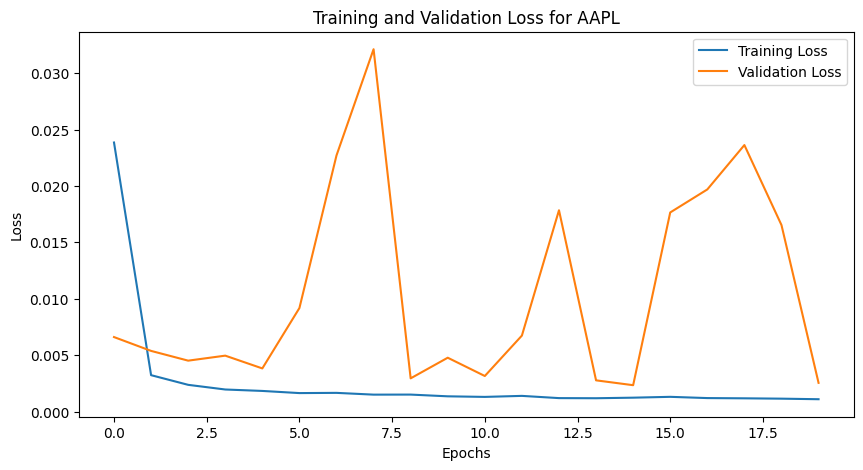

In [ ]:
plot_loss(history_aapl, 'Training and Validation Loss for AAPL')

Hasil training menggunakan arsitektur baseline menunjukkan bahwa loss pada data training (garis biru) terus menurun dan tetap rendah, yang mengindikasikan model belajar dengan baik pada data training. Namun, loss pada data validasi (garis oranye) berfluktuasi dan tidak stabil, menunjukkan bahwa model mungkin mengalami overfitting, dimana model terlalu menyesuaikan pada data training dan kurang mampu menggeneralisasi pada data yang tidak terlihat (validasi). Hal ini menunjukkan perlunya metode regularisasi atau penyesuaian hyperparameter untuk meningkatkan kinerja model pada data validasi.

31/31 [==============================] - 0s 3ms/step


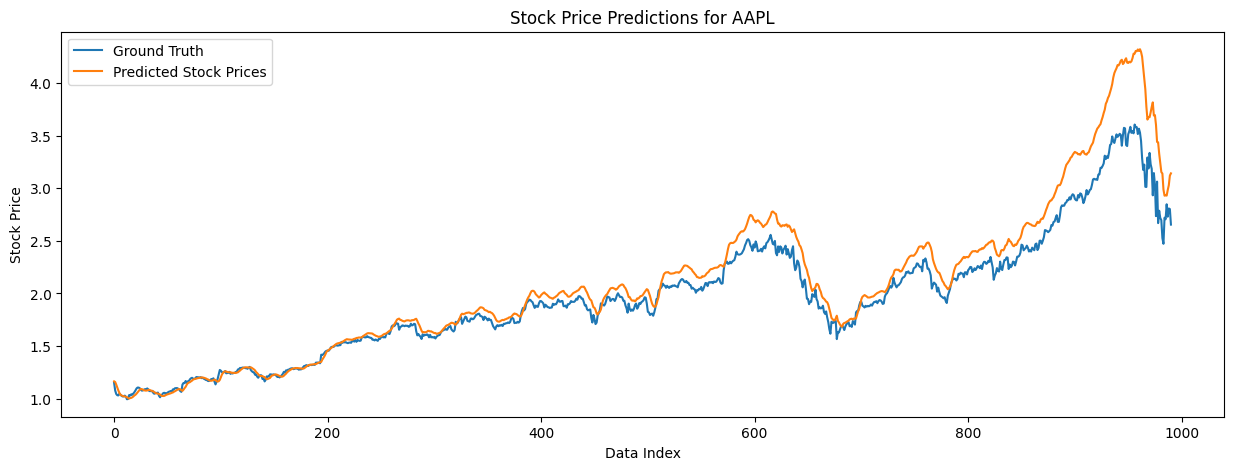

In [ ]:
rmse_aapl, mae_aapl, mape_aapl, y_pred_aapl = evaluate_model(model_aapl, X_test_aapl_scaled, y_test_aapl_scaled)
plot_predictions(y_test_aapl_scaled, y_pred_aapl, 'Stock Price Predictions for AAPL')

Plot di atas menunjukkan bahwa model LSTM baseline mampu mengikuti tren umum harga saham AAPL. Namun, pada beberapa bagian, terutama pada puncak harga, prediksi model lebih fluktuatif dan kurang akurat dibandingkan dengan nilai sebenarnya. Ini mengindikasikan bahwa model mungkin mengalami overfitting dan kesulitan dalam memprediksi harga pada periode volatilitas tinggi.

### AMD

In [ ]:
model_amd = create_lstm_model(input_shape_amd)

In [ ]:
print("Model Summary for AMD:")
model_amd.summary()

Model Summary for AMD:
Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_33 (LSTM)              (None, 50)                10400     
                                                                 
 dense_28 (Dense)            (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history_amd = train_lstm_model(model_amd, X_train_amd_scaled, y_train_amd_scaled, X_val_amd_scaled, y_val_amd_scaled)

Epoch 1/50
253/253 [==============================] - 7s 22ms/step - loss: 0.0027 - val_loss: 1.8345e-05
Epoch 2/50
253/253 [==============================] - 7s 27ms/step - loss: 3.5278e-04 - val_loss: 3.7639e-05
Epoch 3/50
253/253 [==============================] - 5s 20ms/step - loss: 3.2202e-04 - val_loss: 1.5956e-04
Epoch 4/50
253/253 [==============================] - 7s 26ms/step - loss: 3.0844e-04 - val_loss: 5.4289e-05
Epoch 5/50
253/253 [==============================] - 6s 22ms/step - loss: 2.7634e-04 - val_loss: 2.1023e-05
Epoch 6/50
253/253 [==============================] - 5s 20ms/step - loss: 2.7417e-04 - val_loss: 1.1817e-05
Epoch 7/50
253/253 [==============================] - 7s 27ms/step - loss: 2.3222e-04 - val_loss: 1.1329e-05
Epoch 8/50
253/253 [==============================] - 5s 20ms/step - loss: 2.2489e-04 - val_loss: 2.0212e-05
Epoch 9/50
253/253 [==============================] - 6s 26ms/step - loss: 2.0879e-04 - val_loss: 8.7375e-05
Epoch 10/50
253/253 [==

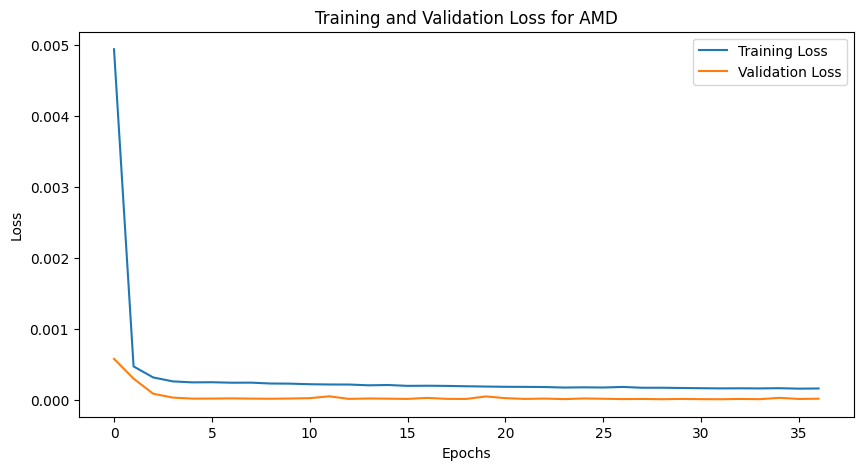

In [ ]:
plot_loss(history_amd, 'Training and Validation Loss for AMD')

Plot di atas menunjukkan bahwa loss pada data training dan validasi untuk AMD terus menurun dan menjadi stabil pada nilai yang sangat rendah. Ini menunjukkan bahwa model LSTM baseline mampu mempelajari pola dalam data dengan baik tanpa mengalami overfitting, mengingat loss pada data validasi tetap rendah dan stabil sepanjang pelatihan.

Visualisasi training loss dan validation loss untuk AMD

32/32 [==============================] - 0s 3ms/step


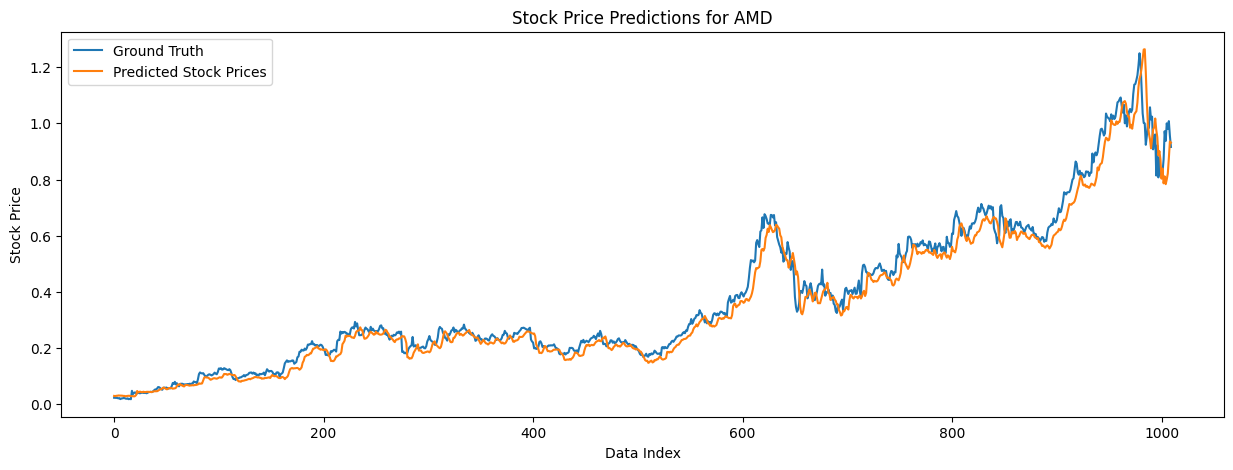

In [ ]:
rmse_amd, mae_amd, mape_amd, y_pred_amd = evaluate_model(model_amd, X_test_amd_scaled, y_test_amd_scaled)
plot_predictions(y_test_amd_scaled, y_pred_amd, 'Stock Price Predictions for AMD')

Plot di atas menunjukkan bahwa prediksi model LSTM untuk harga saham AMD sangat dekat dengan nilai sebenarnya (Ground Truth). Model berhasil mengikuti tren utama dan fluktuasi harga saham dengan baik, menunjukkan kinerja yang baik dalam memprediksi harga saham AMD. Ini mengindikasikan bahwa model mampu menangkap pola temporal dalam data dengan akurasi tinggi.

# C. ARCHITECTURE MODIFICATION

Berikut modifikasi yang saya lakukan untuk mencapai hasil yang lebih optimal:
1. **LSTM Layer**:
   - **Penambahan Lapisan LSTM Kedua**: Menambahkan satu lapisan LSTM tambahan dengan 30 unit dan aktivasi ReLU. Lapisan pertama tetap memiliki 50 unit dengan `return_sequences=True` untuk memastikan output dari lapisan pertama dapat dimasukkan ke lapisan LSTM kedua.
   - **Alasan**: Penambahan lapisan LSTM kedua membantu model untuk menangkap pola temporal yang lebih kompleks dalam data time series.

2. **Dropout Layer**:
   - **Penambahan Dropout**: Menambahkan dropout dengan tingkat drop 20% setelah masing-masing lapisan LSTM.
   - **Alasan**: Dropout digunakan untuk mencegah overfitting dengan mematikan neuron secara acak selama pelatihan. Ini membantu model untuk menjadi lebih robust dan generalisasi lebih baik pada data yang belum pernah dilihat.

3. **Regularisasi L2 (Ridge)**:
   - **Penambahan Regularisasi L2**: Menambahkan regularisasi L2 pada setiap lapisan LSTM dan Dense.
   - **Alasan**: Regularisasi L2 membantu mencegah overfitting dengan menambahkan penalti pada bobot besar dalam model. Ini membantu model untuk tetap sederhana dan menghindari terlalu banyak menyesuaikan diri dengan data training.

4. **Optimizer**:
   - **Pengaturan Learning Rate**: Mengatur learning rate pada optimizer Adam ke 0.001.
   - **Alasan**: Learning rate yang lebih kecil membantu dalam memastikan bahwa model tidak mengambil langkah terlalu besar selama pelatihan, yang dapat menyebabkan model melewatkan minimum global.

5. **Hyperparameters**:
   - **Epochs**: Menetapkan jumlah epoch menjadi 100.
   - **Batch Size**: Menetapkan ukuran batch menjadi 32.
   - **Alasan**: Jumlah epoch dan ukuran batch yang lebih besar membantu model untuk lebih baik dalam menyesuaikan diri dengan data training dan mengkonvergensi ke solusi yang lebih baik.

Modifikasi ini diharapkan dapat membuat model lebih kuat dalam menangkap pola temporal yang kompleks, lebih tahan terhadap overfitting, dan lebih stabil dalam proses pelatihan. Penambahan lapisan LSTM, dropout, regularisasi L2, dan tuning hyperparameter adalah langkah-langkah yang saya diambil untuk mencapai hasil yang lebih optimal dibandingkan dengan arsitektur baseline.

In [ ]:
def create_modified_lstm_model(input_shape, learning_rate=0.001, l2_reg=0.001):
    model = Sequential()
    model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=input_shape, kernel_regularizer=l2(l2_reg)))
    model.add(Dropout(0.2))
    model.add(LSTM(30, activation='relu', kernel_regularizer=l2(l2_reg)))
    model.add(Dropout(0.2))
    model.add(Dense(1, kernel_regularizer=l2(l2_reg)))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mse')
    return model

Define hyperparameter

In [ ]:
# Hyperparameters
learning_rate = 0.001
epochs = 100
batch_size = 32
l2_reg = 0.001

### AAPL

In [ ]:
model_aapl_modified = create_modified_lstm_model(input_shape_aapl, learning_rate, l2_reg)

In [ ]:
print("Model Summary for Modified AAPL:")
model_aapl_modified.summary()

Model Summary for Modified AAPL:
Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_28 (LSTM)              (None, 5, 50)             10400     
                                                                 
 dropout_18 (Dropout)        (None, 5, 50)             0         
                                                                 
 lstm_29 (LSTM)              (None, 30)                9720      
                                                                 
 dropout_19 (Dropout)        (None, 30)                0         
                                                                 
 dense_25 (Dense)            (None, 1)                 31        
                                                                 
Total params: 20151 (78.71 KB)
Trainable params: 20151 (78.71 KB)
Non-trainable params: 0 (0.00 Byte)
__________________________________________________

In [ ]:
history_aapl_modified = train_lstm_model(model_aapl_modified, X_train_aapl_scaled, y_train_aapl_scaled, X_val_aapl_scaled, y_val_aapl_scaled, epochs=epochs, batch_size=batch_size)

Epoch 1/100
248/248 [==============================] - 5s 9ms/step - loss: 0.0239 - val_loss: 0.0066
Epoch 2/100
248/248 [==============================] - 2s 10ms/step - loss: 0.0032 - val_loss: 0.0054
Epoch 3/100
248/248 [==============================] - 3s 11ms/step - loss: 0.0024 - val_loss: 0.0045
Epoch 4/100
248/248 [==============================] - 2s 7ms/step - loss: 0.0020 - val_loss: 0.0050
Epoch 5/100
248/248 [==============================] - 2s 8ms/step - loss: 0.0018 - val_loss: 0.0038
Epoch 6/100
248/248 [==============================] - 2s 7ms/step - loss: 0.0016 - val_loss: 0.0092
Epoch 7/100
248/248 [==============================] - 2s 7ms/step - loss: 0.0017 - val_loss: 0.0227
Epoch 8/100
248/248 [==============================] - 2s 8ms/step - loss: 0.0015 - val_loss: 0.0321
Epoch 9/100
248/248 [==============================] - 2s 10ms/step - loss: 0.0015 - val_loss: 0.0029
Epoch 10/100
248/248 [==============================] - 3s 11ms/step - loss: 0.0014 - va

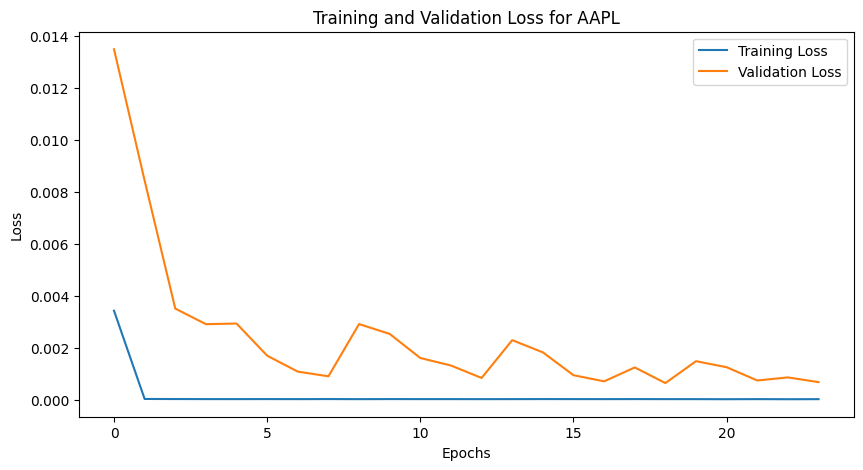

In [ ]:
plot_loss(history_aapl_modified, 'Training and Validation Loss for AAPL')

Plot di atas menunjukkan bahwa loss pada data training (garis biru) untuk AAPL cepat menurun ke nol, sementara loss pada data validasi (garis oranye) menurun tetapi tetap fluktuatif. Ini menunjukkan bahwa model mampu mempelajari data training dengan sangat baik, namun masih mengalami sedikit overfitting, karena performa pada data validasi tidak stabil dan fluktuatif.

31/31 [==============================] - 0s 3ms/step


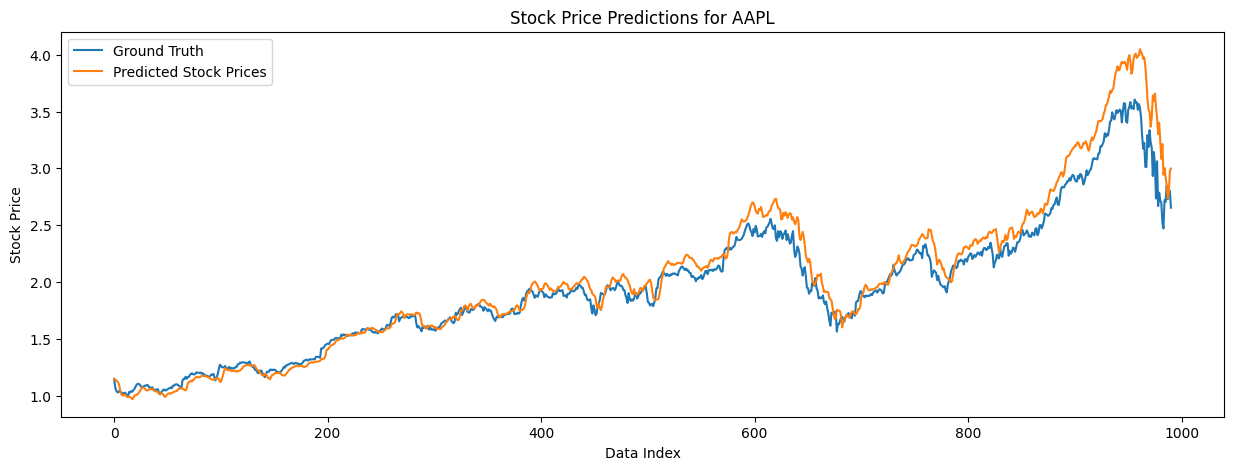

In [ ]:
rmse_aapl_mod, mae_aapl_mod, mape_aapl_mod, y_pred_aapl_mod = evaluate_model(model_aapl_modified, X_test_aapl_scaled, y_test_aapl_scaled)
plot_predictions(y_test_aapl_scaled, y_pred_aapl_mod, 'Stock Price Predictions for AAPL')

Plot di atas menunjukkan bahwa prediksi harga saham (garis oranye) umumnya mengikuti tren harga saham sebenarnya (garis biru) untuk AAPL. Meskipun ada keselarasan yang baik di sebagian besar data, pada beberapa periode, terutama pada puncak harga, prediksi model cenderung lebih tinggi dari harga sebenarnya. Hal ini menunjukkan bahwa model memiliki performa yang baik namun masih perlu perbaikan untuk mengurangi overfitting dan meningkatkan akurasi pada periode volatilitas tinggi.

### AMD

In [ ]:
model_amd_modified = create_modified_lstm_model(input_shape_amd)

In [ ]:
print("Model Summary for Modified AMD:")
model_amd_modified.summary()

Model Summary for Modified AMD:
Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_41 (LSTM)              (None, 5, 50)             10400     
                                                                 
 dropout_24 (Dropout)        (None, 5, 50)             0         
                                                                 
 lstm_42 (LSTM)              (None, 30)                9720      
                                                                 
 dropout_25 (Dropout)        (None, 30)                0         
                                                                 
 dense_35 (Dense)            (None, 1)                 31        
                                                                 
Total params: 20151 (78.71 KB)
Trainable params: 20151 (78.71 KB)
Non-trainable params: 0 (0.00 Byte)
___________________________________________________

In [ ]:
history_amd_modified = train_lstm_model(model_amd_modified, X_train_amd_scaled, y_train_amd_scaled, X_val_amd_scaled, y_val_amd_scaled, epochs=epochs, batch_size=batch_size)

Epoch 1/100
253/253 [==============================] - 5s 9ms/step - loss: 0.0291 - val_loss: 0.0053
Epoch 2/100
253/253 [==============================] - 3s 10ms/step - loss: 0.0049 - val_loss: 0.0036
Epoch 3/100
253/253 [==============================] - 2s 9ms/step - loss: 0.0037 - val_loss: 0.0027
Epoch 4/100
253/253 [==============================] - 2s 7ms/step - loss: 0.0033 - val_loss: 0.0025
Epoch 5/100
253/253 [==============================] - 2s 7ms/step - loss: 0.0030 - val_loss: 0.0028
Epoch 6/100
253/253 [==============================] - 2s 7ms/step - loss: 0.0028 - val_loss: 0.0022
Epoch 7/100
253/253 [==============================] - 2s 7ms/step - loss: 0.0028 - val_loss: 0.0021
Epoch 8/100
253/253 [==============================] - 2s 7ms/step - loss: 0.0026 - val_loss: 0.0022
Epoch 9/100
253/253 [==============================] - 2s 10ms/step - loss: 0.0026 - val_loss: 0.0020
Epoch 10/100
253/253 [==============================] - 3s 10ms/step - loss: 0.0024 - val

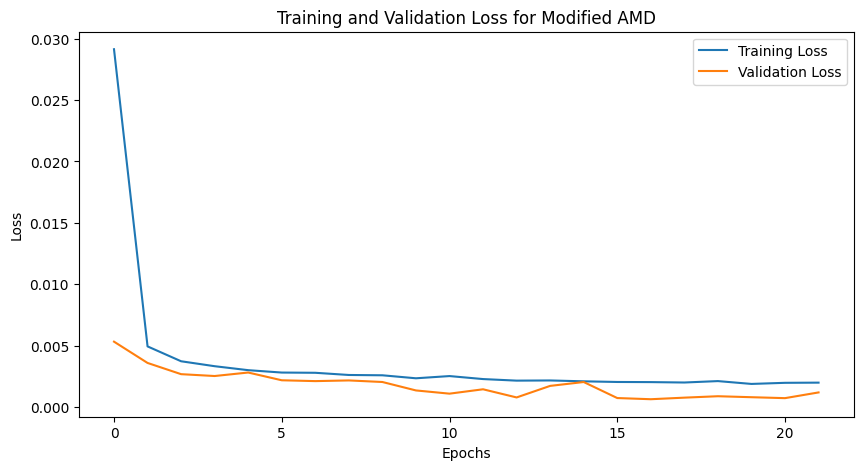

In [ ]:
plot_loss(history_amd_modified, 'Training and Validation Loss for Modified AMD')


Plot di atas menunjukkan bahwa loss pada data training dan validasi untuk model AMD yang dimodifikasi menurun dengan cepat dan menjadi stabil pada nilai yang sangat rendah. Ini menunjukkan bahwa model berhasil mempelajari pola data dengan baik tanpa mengalami overfitting, karena loss pada data validasi tetap rendah dan stabil sepanjang pelatihan.

32/32 [==============================] - 0s 3ms/step


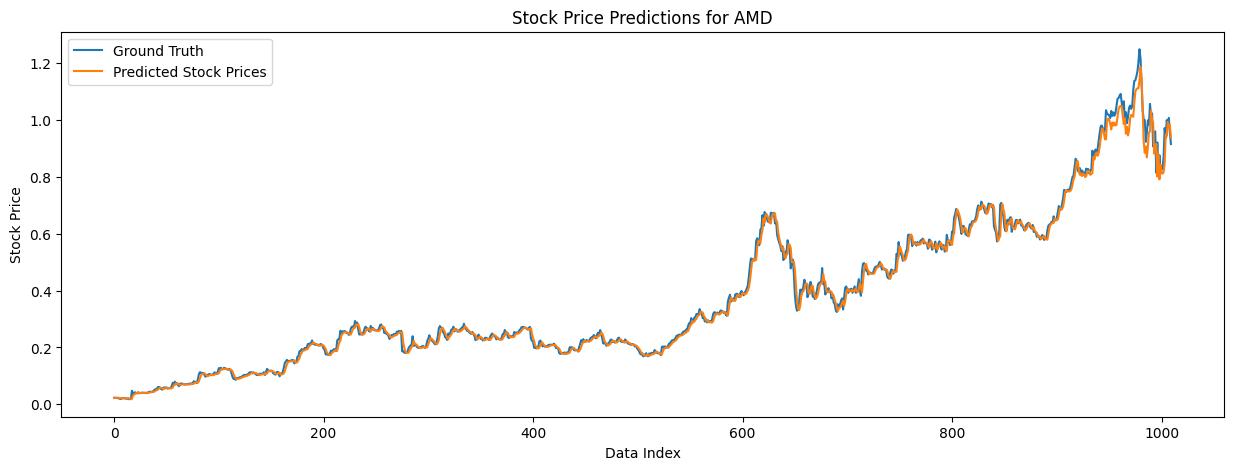

In [ ]:
rmse_amd_mod, mae_amd_mod, mape_amd_mod, y_pred_amd_mod = evaluate_model(model_amd_modified, X_test_amd_scaled, y_test_amd_scaled)
plot_predictions(y_test_amd_scaled, y_pred_amd_mod, 'Stock Price Predictions for AMD')

Plot di atas menunjukkan bahwa prediksi harga saham AMD (garis oranye) mengikuti dengan sangat baik harga saham sebenarnya (garis biru). Model yang dimodifikasi mampu memprediksi tren dan fluktuasi harga saham dengan akurasi tinggi, menunjukkan kinerja yang sangat baik dalam menangkap pola temporal dalam data AMD.

# D. EVALUATION

## Baseline Architecture

### AAPL

In [ ]:
rmse_aapl, mae_aapl, mape_aapl, y_pred_aapl = evaluate_model(model_aapl, X_test_aapl_scaled, y_test_aapl_scaled)
print("Evaluation Metrics for AAPL:")
print(f"RMSE: {rmse_aapl}")
print(f"MAE: {mae_aapl}")
print(f"MAPE: {mape_aapl}")

31/31 [==============================] - 0s 2ms/step
Evaluation Metrics for AAPL:
RMSE: 0.2136153897257214
MAE: 0.13623810218628626
MAPE: 0.057516923292774816


In [64]:
rmse_scaled = 0.2136153897257214
mae_scaled = 0.13623810218628626
mape_scaled = 0.057516923292774816

rmse_original = rmse_scaled * (max_val - min_val)
mae_original = mae_scaled * (max_val - min_val)

print("Original RMSE:", rmse_original)
print("Original MAE:", mae_original)
print("MAPE (%):", mape_scaled)

Original RMSE: 19.373542476860813
Original MAE: 12.355919969351858
MAPE (%): 0.057516923292774816


### AMD

In [ ]:
rmse_amd, mae_amd, mape_amd, y_pred_amd = evaluate_model(model_amd, X_test_amd_scaled, y_test_amd_scaled)
print("Evaluation Metrics for AMD:")
print(f"RMSE: {rmse_amd}")
print(f"MAE: {mae_amd}")
print(f"MAPE: {mape_amd}")

32/32 [==============================] - 0s 7ms/step
Evaluation Metrics for AMD:
RMSE: 0.02010355108702166
MAE: 0.012432692039798663
MAPE: 0.03843341772659234


In [65]:
rmse_scaled_amd = 0.02010355108702166
mae_scaled_amd = 0.012432692039798663
mape_scaled_amd = 0.03843341772659234

rmse_original_amd = rmse_scaled_amd * (max_val_amd - min_val_amd)
mae_original_amd = mae_scaled_amd * (max_val_amd - min_val_amd)

print("Original RMSE for AMD:", rmse_original_amd)
print("Original MAE for AMD:", mae_original_amd)
print("MAPE for AMD (%):", mape_scaled_amd)

Original RMSE for AMD: 0.9187322856355019
Original MAE for AMD: 0.5681740268116359
MAPE for AMD (%): 0.03843341772659234


Analisis Hasil Berdasarkan Kinerja Model Baseline Architecture:
1. RMSE (Root Mean Squared Error):
  - RMSE mengukur rata-rata kesalahan kuadrat antara prediksi dan nilai sebenarnya. Semakin kecil nilai RMSE, semakin baik model dalam memprediksi harga saham. Dari hasil ini, model untuk AMD memiliki RMSE yang jauh lebih kecil daripada model untuk AAPL, menunjukkan bahwa model lebih cocok untuk memprediksi harga saham AMD.

2. MAE (Mean Absolute Error):
  - MAE mengukur rata-rata kesalahan absolut antara prediksi dan nilai sebenarnya. Sama seperti RMSE, semakin kecil nilai MAE, semakin baik model dalam memprediksi harga saham. Hasil ini juga menunjukkan bahwa model lebih cocok untuk memprediksi harga saham AMD dibandingkan dengan AAPL.

3. MAPE (Mean Absolute Percentage Error):
  - MAPE mengukur kesalahan prediksi sebagai persentase dari nilai sebenarnya. MAPE yang lebih rendah menunjukkan bahwa model lebih akurat. Model memiliki MAPE yang lebih rendah untuk saham AMD, menunjukkan bahwa prediksi harga saham AMD lebih dekat dengan nilai sebenarnya.

Faktor-Faktor yang Mempengaruhi Kinerja Model
1. Arsitektur Model:
    - Penggunaan LSTM dengan 50 unit adalah konfigurasi yang kuat untuk memodelkan data time series karena kemampuannya dalam menangkap hubungan temporal dalam data.
    - Aktivasi ReLU membantu model untuk belajar pola non-linear dalam data.

2. Preprocessing Data:
    - Penggunaan MinMaxScaler membantu dalam memastikan bahwa semua fitur berada dalam skala yang sama, yang penting untuk konvergensi yang lebih baik selama pelatihan.

3. Karakteristik Data:
    - Data harga saham AMD tampaknya lebih stabil dan kurang volatil dibandingkan dengan data harga saham AAPL. Ini terlihat dari nilai MAE dan RMSE yang lebih kecil untuk model AMD. Harga saham yang lebih stabil lebih mudah diprediksi oleh model.
    - Kedua dataset memiliki jumlah data yang memadai untuk melatih model, namun distribusi dan fluktuasi harga yang berbeda mempengaruhi kinerja model. Model mungkin lebih baik dalam memprediksi data dengan fluktuasi yang lebih rendah (seperti AMD).

4. Early Stopping:
    - Menggunakan early stopping membantu dalam mencegah overfitting, dengan menghentikan pelatihan ketika model tidak menunjukkan perbaikan pada data validasi. Ini membantu menjaga kinerja model pada data test.

Model LSTM yang dibangun menunjukkan kinerja yang baik dalam memprediksi harga saham, dengan model yang tampak lebih cocok untuk dataset saham AMD dibandingkan dengan AAPL. Hal ini disebabkan oleh beberapa faktor, termasuk arsitektur model, preprocessing data, karakteristik volatilitas data saham, dan penggunaan teknik regularisasi seperti early stopping. Evaluasi ini menunjukkan bahwa model lebih cocok untuk memprediksi harga saham dengan volatilitas yang lebih rendah dan fluktuasi yang lebih stabil, seperti yang terlihat pada dataset AMD.

## Modification Architecture

### AAPL

In [ ]:
rmse_aapl_mod, mae_aapl_mod, mape_aapl_mod, y_pred_aapl_mod = evaluate_model(model_aapl_modified, X_test_aapl_scaled, y_test_aapl_scaled)
print("Evaluation Metrics for Modified AAPL:")
print(f"RMSE: {rmse_aapl_mod}")
print(f"MAE: {mae_aapl_mod}")
print(f"MAPE: {mape_aapl_mod}")

31/31 [==============================] - 0s 3ms/step
Evaluation Metrics for Modified AAPL:
RMSE: 0.15595058705042375
MAE: 0.10308994712055117
MAPE: 0.04682554322642922


In [66]:
rmse_scaled = 0.15595058705042375
mae_scaled = 0.10308994712055117
mape_scaled = 0.04682554322642922

rmse_original = rmse_scaled * (max_val - min_val)
mae_original = mae_scaled * (max_val - min_val)

print("Original RMSE:", rmse_original)
print("Original MAE:", mae_original)
print("MAPE (%):", mape_scaled)

Original RMSE: 14.143715611464524
Original MAE: 9.349595420263151
MAPE (%): 0.04682554322642922


### AMD

In [ ]:
rmse_amd_mod, mae_amd_mod, mape_amd_mod, y_pred_amd_mod = evaluate_model(model_amd_modified, X_test_amd_scaled, y_test_amd_scaled)
print("Evaluation Metrics for Modified AMD:")
print(f"RMSE: {rmse_amd_mod}")
print(f"MAE: {mae_amd_mod}")
print(f"MAPE: {mape_amd_mod}")

32/32 [==============================] - 0s 2ms/step
Evaluation Metrics for Modified AMD:
RMSE: 0.01946412160906766
MAE: 0.01198061967024844
MAPE: 0.036020718861412365


In [67]:
rmse_scaled_amd = 0.01946412160906766
mae_scaled_amd = 0.01198061967024844
mape_scaled_amd = 0.036020718861412365

rmse_original_amd = rmse_scaled_amd * (max_val_amd - min_val_amd)
mae_original_amd = mae_scaled_amd * (max_val_amd - min_val_amd)

print("Original RMSE for AMD:", rmse_original_amd)
print("Original MAE for AMD:", mae_original_amd)
print("MAPE for AMD (%):", mape_scaled_amd)

Original RMSE for AMD: 0.8895103584625136
Original MAE for AMD: 0.5475143195016342
MAPE for AMD (%): 0.036020718861412365


Analisis Hasil Berdasarkan Kinerja Model yang Dimodifikasi:

Setelah melakukan modifikasi pada arsitektur model, hasil evaluasi menunjukkan peningkatan kinerja dibandingkan dengan arsitektur baseline.
- Untuk dataset AAPL
  - RMSE turun dari 0.2136 menjadi 0.1560
  - MAE turun dari 0.1362 menjadi 0.1031
  - MAPE turun dari 0.0575 menjadi 0.0468.
- Untuk dataset AMD
  - RMSE turun dari 0.0201 menjadi 0.0195
  - MAE turun dari 0.0124 menjadi 0.0120
  - MAPE turun dari 0.0384 menjadi 0.0360.

Meskipun penurunan error tidak signifikan, ini menunjukkan bahwa model yang dimodifikasi lebih baik dalam memprediksi harga saham dibandingkan dengan model baseline.

Hal ini menegaskan bahwa model, baik baseline maupun yang dimodifikasi, lebih cocok untuk dataset AMD yang memiliki volatilitas lebih rendah dan fluktuasi harga yang lebih stabil. Evaluasi ini menunjukkan bahwa dengan penambahan lapisan LSTM, penggunaan dropout, dan regularisasi L2, model dapat mengurangi error prediksi, walaupun peningkatan yang diperoleh relatif kecil, tetap menghasilkan model yang lebih akurat terutama pada dataset AMD.